## Janine Ali Ahmad - Lou Girault - TDA

# Importations

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from utils import *
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

# Chargement des données

In [2]:
airbnb_train = pd.read_csv("airbnb_train_cleaned.csv")
airbnb_train

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,4.317488,0.0,0,15,3,1.0,0,0,0,0,0,0,-1,0,33.782712,-118.134410,0,-1.0,0.0,2.0
1,4.007333,0.0,0,25,4,2.0,0,1,0,1,0,1,100,0,40.705468,-73.909439,38,86.0,1.0,2.0
2,7.090077,1.0,1,20,6,2.0,0,0,0,2,0,0,-1,0,38.917537,-77.031651,0,-1.0,2.0,2.0
3,3.555348,0.0,0,30,1,1.0,0,0,1,1,0,1,100,1,40.736001,-73.924248,19,96.0,1.0,1.0
4,5.480639,0.0,1,24,4,1.0,0,2,1,3,0,1,100,1,37.744896,-122.430665,15,96.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,4.605170,1.0,0,1,1,1.0,0,0,0,1,0,1,-1,1,40.709025,-73.939405,0,-1.0,1.0,1.0
22230,5.043425,1.0,1,16,4,2.0,0,2,1,0,0,0,100,1,33.871549,-118.396053,16,93.0,2.0,4.0
22231,5.220356,1.0,1,31,5,1.0,0,2,1,1,0,1,100,0,40.706749,-73.942377,43,94.0,2.0,2.0
22232,5.273000,1.0,1,15,2,1.0,0,1,1,1,0,0,100,0,40.738535,-74.000157,0,-1.0,0.0,2.0


# Train-Test split

On récupere les données de notre ficher train. Pour X on donne les valeurs des toutes les colonnes autres que log_price (les caractéristiques) et pour y, on lui donne les données de log_price (la cible).


In [3]:
X=airbnb_train.drop(columns=["log_price"])
X

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,0.0,0,15,3,1.0,0,0,0,0,0,0,-1,0,33.782712,-118.134410,0,-1.0,0.0,2.0
1,0.0,0,25,4,2.0,0,1,0,1,0,1,100,0,40.705468,-73.909439,38,86.0,1.0,2.0
2,1.0,1,20,6,2.0,0,0,0,2,0,0,-1,0,38.917537,-77.031651,0,-1.0,2.0,2.0
3,0.0,0,30,1,1.0,0,0,1,1,0,1,100,1,40.736001,-73.924248,19,96.0,1.0,1.0
4,0.0,1,24,4,1.0,0,2,1,3,0,1,100,1,37.744896,-122.430665,15,96.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,1.0,0,1,1,1.0,0,0,0,1,0,1,-1,1,40.709025,-73.939405,0,-1.0,1.0,1.0
22230,1.0,1,16,4,2.0,0,2,1,0,0,0,100,1,33.871549,-118.396053,16,93.0,2.0,4.0
22231,1.0,1,31,5,1.0,0,2,1,1,0,1,100,0,40.706749,-73.942377,43,94.0,2.0,2.0
22232,1.0,1,15,2,1.0,0,1,1,1,0,0,100,0,40.738535,-74.000157,0,-1.0,0.0,2.0


In [4]:
y=airbnb_train['log_price']
y

0        4.317488
1        4.007333
2        7.090077
3        3.555348
4        5.480639
           ...   
22229    4.605170
22230    5.043425
22231    5.220356
22232    5.273000
22233    4.852030
Name: log_price, Length: 22234, dtype: float64

On récupere le nombre de lignes (d'exemple) :


In [5]:
n_example = y.shape[0]
print("Nombre d'exemples:", n_example)

Nombre d'exemples: 22234


## Standardization

Nous avons remarqué que la standardisation entraîne une perte significative de précision, c'est pourquoi nous avons choisi de conserver les données telles quelles, sauf eventuellement pour les modeles de regression lineaire.

In [6]:
scalerX = StandardScaler()

X_std = scalerX.fit_transform(X)
X= pd.DataFrame(X_std, columns=X.columns)
X

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,-0.564041,-1.129746,-0.382908,-0.072568,-0.396238,-0.153538,-1.270531,-1.676831,-0.950510,-0.075494,-1.433074,-1.656998,-1.676831,-1.523715,-1.193613,-0.555922,-1.834591,-1.480309,0.231915
1,-0.564041,-1.129746,1.055804,0.393889,1.302887,-0.153538,0.056897,-1.676831,-0.212784,-0.075494,0.697801,0.668261,-1.676831,0.730072,0.847264,0.466054,0.328609,-0.308521,0.231915
2,-0.184589,0.706153,0.336448,1.326802,1.302887,-0.153538,-1.270531,-1.676831,0.524942,-0.075494,-1.433074,-1.656998,-1.676831,0.147989,0.703181,-0.555922,-1.834591,0.863268,0.231915
3,-0.564041,-1.129746,1.775159,-1.005481,-0.396238,-0.153538,-1.270531,0.596363,-0.212784,-0.075494,0.697801,0.668261,0.596363,0.740013,0.846581,-0.044934,0.577253,-0.308521,-0.564440
4,-0.564041,0.706153,0.911932,0.393889,-0.396238,-0.153538,1.384324,0.596363,1.262669,-0.075494,0.697801,0.668261,0.596363,-0.233778,-1.391875,-0.152510,0.577253,0.863268,0.231915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,-0.184589,-1.129746,-2.397104,-1.005481,-0.396238,-0.153538,-1.270531,-1.676831,-0.212784,-0.075494,0.697801,-1.656998,0.596363,0.731230,0.845881,-0.555922,-1.834591,-0.308521,-0.564440
22230,-0.184589,0.706153,-0.239037,0.393889,1.302887,-0.153538,1.384324,0.596363,-0.950510,-0.075494,-1.433074,0.668261,0.596363,-1.494793,-1.205687,-0.125616,0.502660,0.863268,1.824626
22231,-0.184589,0.706153,1.919031,0.860345,-0.396238,-0.153538,1.384324,0.596363,-0.212784,-0.075494,0.697801,0.668261,-1.676831,0.730489,0.845744,0.600524,0.527524,0.863268,0.231915
22232,-0.184589,0.706153,-0.382908,-0.539024,-0.396238,-0.153538,0.056897,0.596363,-0.212784,-0.075494,-1.433074,0.668261,-1.676831,0.740837,0.843078,-0.555922,-1.834591,-1.480309,0.231915


In [7]:
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,random_state=42)

print ("Dimension pour X train:", X_train.shape)
print ("Dimension pour X test:", X_test.shape)
print ("Dimension pour  y train:", y_train.shape)
print ("Dimension pour y test:", y_test.shape)

Dimension pour X train: (17787, 19)
Dimension pour X test: (4447, 19)
Dimension pour  y train: (17787,)
Dimension pour y test: (4447,)


## Baseline modele

Le "Baseline modele" pour un problème de régression consiste simplement à prédire sans tenir compte des informations supplémentaires apportées par les caractéristiques, c'est-à-dire en utilisant uniquement la variable cible qui est ici le log du prix. Le meilleur prédicteur, qui minimise le RMSE (erreur quadratique moyenne = mean sqaure error), est la moyenne de la distribution de la variable cible, et sera donc utilisé comme référence de comparaison avec les autres modèles. En fait, si nous utilisons le coefficient de détermination R² comme métrique d'évaluation, cette référence est déjà incorporée dans la formule, donc toutes les performances seront mesurées par rapport à cette référence.

In [8]:
y.mean()

4.783480914904761

Pour ce problème, le modèle de référence consiste à prédire toujours 4,78 comme étant le log du prix.

# Regression Lineaire Simple
Dans un premier temps, nous essayons de faire une régression lineéaire simple en faisant varier le pourcentage de train/test ( % de colonnes dans le train et dans le test).


In [9]:
percent_train = 0.5

while (percent_train < 0.9):
    print("Le pourcentage d'entrainement :", percent_train)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percent_train, random_state =0)
    # Nous séparons donc les données avec la fct train_test_split.

    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape) # On print les taille des x, y train/test pour avoir une idée de la séparation faite

    lin = LinearRegression() # nous faisons la regression linéaire
    lin.fit(X_train, y_train) 

    y_pred_train = lin.predict(X_train) # puis on applique la prediction sur nos train/test 
    y_pred_test = lin.predict(X_test)

    train_score = mean_squared_error(y_pred=y_pred_train, y_true=y_train) # ici, on calcule la mse entre les données predites et 
    # les données réelles
    test_score = mean_squared_error(y_pred=y_pred_test, y_true=y_test)

    train_r2 = r2_score(y_true=y_train, y_pred=y_pred_train) # et on calcule le R^2 pour connaitre de pourcentage de precision
    test_r2 = r2_score(y_true=y_test, y_pred=y_pred_test)
    
    print(f"MSE train {train_score}, MSE test {test_score}")
    print(f"R2 train {train_r2}, R2 test {test_r2}")

    
    percent_train = percent_train + 0.1 # on incremente le percent_train

Le pourcentage d'entrainement : 0.5
(11117, 19) (11117,)
(11117, 19) (11117,)
MSE train 0.29467299401614316, MSE test 0.29404361413202357
R2 train 0.43435678477689366, R2 test 0.42593843417662425
Le pourcentage d'entrainement : 0.6
(8893, 19) (8893,)
(13341, 19) (13341,)
MSE train 0.2902774837958241, MSE test 0.297286660969585
R2 train 0.43862692299546147, R2 test 0.4241413742625145
Le pourcentage d'entrainement : 0.7
(6670, 19) (6670,)
(15564, 19) (15564,)
MSE train 0.2897853909848719, MSE test 0.2966464023071037
R2 train 0.4358327336327261, R2 test 0.4271368841303259
Le pourcentage d'entrainement : 0.7999999999999999
(4446, 19) (4446,)
(17788, 19) (17788,)
MSE train 0.28550987051683907, MSE test 0.2974338382314596
R2 train 0.4370113336530619, R2 test 0.4268581055829578
Le pourcentage d'entrainement : 0.8999999999999999
(2223, 19) (2223,)
(20011, 19) (20011,)
MSE train 0.27295038639968316, MSE test 0.30073856693654616
R2 train 0.4538946009836703, R2 test 0.41993176926732456


On voit facilement que notre R2 tourne autour des 42% ce qui n'est pas satisfaisant Alors, on essaye de refaire ce modele avec cette fois une regression lineaire polynomiale controlée (d'ou le ridge) pour eviter un sur apprentissage.

On repart sur notre split de base avec 80/20.

In [10]:
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,random_state=42)

print ("Dimension pour X train:", X_train.shape)
print ("Dimension pour X test:", X_test.shape)
print ("Dimension pour  y train:", y_train.shape)
print ("Dimension pour y test:", y_test.shape)

Dimension pour X train: (17787, 19)
Dimension pour X test: (4447, 19)
Dimension pour  y train: (17787,)
Dimension pour y test: (4447,)


# Regression lineaire Polynomiale

In [11]:
for alpha in [1e-3, 1e-2, 1e-1]:  # on fait varier les alpha (voir td descente de gradient)
    for n_poly_feat in [2, 3, 4]:  # et le degré du polynome
        
        polyRidge = make_pipeline(PolynomialFeatures(n_poly_feat), Ridge(alpha=alpha))
        polyRidge.fit(X_train, y_train) 

        y_pred_train = polyRidge.predict(X_train) # on applique nos models de prédiction a X train/test
        y_pred_test = polyRidge.predict(X_test)

        train_score = mean_squared_error(y_pred=y_pred_train, y_true=y_train) # puis on calcule les mse
        test_score = mean_squared_error(y_pred=y_pred_test, y_true=y_test)

        train_r2 = r2_score(y_true=y_train, y_pred=y_pred_train) # et R2
        test_r2 = r2_score(y_true=y_test, y_pred=y_pred_test)
        
        print(f"R2 train {train_r2}, R2 test {test_r2}")
        print(f"For {n_poly_feat} polynomial features, alpha = {alpha} : Train Score {train_score} Test Score {test_score}")

R2 train 0.6122705997289715, R2 test 0.58650517393609
For 2 polynomial features, alpha = 0.001 : Train Score 0.20070026672617455 Test Score 0.21183100125434437
R2 train 0.6951924918281034, R2 test -3.878108431145275
For 3 polynomial features, alpha = 0.001 : Train Score 0.15777742969059894 Test Score 2.4990266578016382
R2 train 0.8091828571089463, R2 test -215.64505293222697
For 4 polynomial features, alpha = 0.001 : Train Score 0.09877262711414417 Test Score 110.9860041449248
R2 train 0.6122701010469124, R2 test 0.5865303684672554
For 2 polynomial features, alpha = 0.01 : Train Score 0.20070052485883666 Test Score 0.21181809424214856
R2 train 0.6897385259022737, R2 test -3.155204292045645
For 3 polynomial features, alpha = 0.01 : Train Score 0.1606005646276564 Test Score 2.128687059954491
R2 train 0.802160355342328, R2 test -76.397096291736
For 4 polynomial features, alpha = 0.01 : Train Score 0.10240768284285627 Test Score 39.65008355176687
R2 train 0.6122421263853697, R2 test 0.5866

On remarque que notre erreur R2 est négative, à l'exception d'une fois où elle est de 0,5, ce qui reste insatisfaisant. Une erreur R2 négative indique que le modèle a une performance inférieure à celle du modèle de référence. Le modèle présente donc une performance très médiocre et nous ne le conserverons pas.

# Descente du Gradient (manuelle)

In [12]:
def add_one_to_dataset(dataset): 
    dataset_new = np.column_stack((np.ones(dataset.shape[0]), dataset))
    return dataset_new

def forward(x, theta):
    return x@theta;

def mse_for_all_dataset(labels, dataset):
    sum = 0
    for i in range(0,len(labels)):
        sum += (dataset[i] - labels[i])**2
    return sum/len(labels)

def test_model(dataset,labels,poids):
    p_labels=forward(dataset,poids)
    return mse_for_all_dataset(p_labels,labels)

dataset=add_one_to_dataset(np.array(airbnb_train))
labels=np.array(y)

test_model(dataset,labels,np.ones(21))

def grad_theta(dataset_test, labels_test, theta):
    new_theta = (dataset_test@theta - labels_test)@dataset_test/dataset_test.shape[0]
    return new_theta

def train(dataset, labels, init_theta, num_update, learning_rate):
    new_theta = init_theta.copy()
    for i in range(0,num_update):
        new_theta -= learning_rate*grad_theta(dataset, labels, new_theta)
    return new_theta

init_theta = np.random.random(dataset.shape[1])

# Adaptez la fonction train ici en fonction de vos paramètres.
new_w = train(dataset, labels, init_theta, num_update=5, learning_rate=1e-4)
print("Erreur finale : {:.1f}".format(test_model(dataset,labels,new_w)))

Erreur finale : 15253.2


On applique la descente de gradient à notre modèle, mais il est clair que notre erreur finale est bien plus élevée que sur les autres modèles précédents, donc nous ne retenons pas cette méthode.

Par conséquent, nous orientons notre réflexion vers d'autres modèles.

# Arbre de décision

Pour réduire le surapprentissage, on entraîne un arbre de décision étendu (jusqu'à ce que nous ayons 1 échantillon par feuille) puis puis on peut élaguer l'arbre avec le paramètre de complexité ccp_alpha. Ce paramètre sera choisi à travers une validation croisée en 5 parties.

In [13]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import plot_tree

Dans ce qui suit, le code fait la validation croisée pour différentes valeurs du paramètre de complexité ccp_alpha dans un arbre de décision. Pour chaque valeur de ccp_alpha dans la liste [0, 0.00005, 0.0001, 0.0005, 0.001] on effectue une validation croisée en 5 parties avec cet arbre sur les données d'entraînement pui on calcule les scores moyens d'entraînement et de validation et on les stock dans des lists.

In [14]:
train_scores = []
validation_scores = []
cps = []
#tqdm: bibliothèque pour afficher une barre de progression pour la boucle, ce qui facilite le suivi de l'avancement.
for cp in tqdm([0,0.00005,0.0001,0.0005,0.001]):
    cps.append(cp)
    dtr = DTR(ccp_alpha=cp) #Instancier un Régressseur à Arbre de Décision (DTR) avec la valeur actuelle de ccp_alpha.
    resultats = cross_validate(dtr, X_train, y_train, cv=5, return_train_score = True)
    train_scores.append(resultats["train_score"].mean())
    validation_scores.append(resultats["test_score"].mean())

100%|██████████| 5/5 [00:23<00:00,  4.67s/it]


R² nous permet de savoir dans quelle mesure le modèle s'ajuste aux données d'entraînement sur lesquelles il a été formé. Nous pouvons également utiliser OSR², qui est le score de validation, pour évaluer à quel point le modèle se généralise bien aux nouvelles données invisibles. Ensuite, nous traçons les scores de validation et les scores d'entraînement en fonction des valeurs de cp afin de déduire celui qui offre le meilleur OSR², indiquant ainsi le modèle le plus performant.

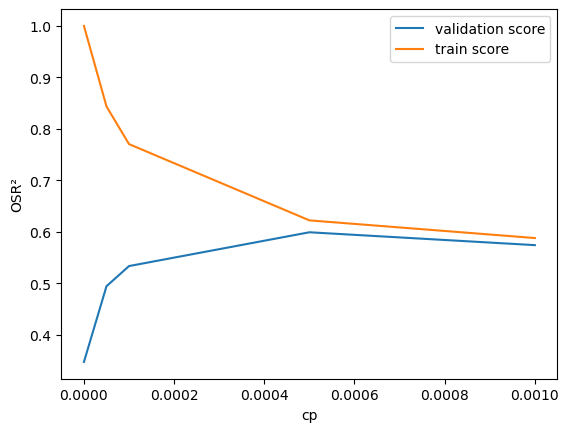

In [15]:
ax=plt.plot(cps, validation_scores)
ax=plt.plot(cps, train_scores)
ax=plt.legend(["validation score", "train score"])
ax=plt.xlabel("cp")
ax=plt.ylabel("OSR²")

on voit ici que cp=0.0005 donne le meilleur OSR2. Donc on entraine notre model d'arbre de decision avec cette valeur

In [16]:
dtr = DTR(ccp_alpha=0.0005)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0005)

On cherche maintenant à comprendre l'importance relative de chaque caracteristique dans notre modèle.

In [17]:
ft_importance = pd.DataFrame({"colonnes": X_train.columns, "importance": dtr.feature_importances_}).sort_values("importance", ascending=False).query("importance > 0")
print(ft_importance.shape[0])
ft_importance

10


,colonnes,importance
1,room_type,0.543483
17,bedrooms,0.185763
14,longitude,0.086939
4,bathrooms,0.079866
13,latitude,0.054830
15,number_of_reviews,0.019889
3,accommodates,0.018470
16,review_scores_rating,0.006405
0,property_type,0.002763
11,host_response_rate,0.001592


On voit donc que le type de chambre, le nombre de lits et la localisation (longitude/latitude) ont le plus d'importance. Ceci est assez logique, car ces trois caractéristiques sont celles qui comptent le plus pour estimer le prix d'un bien immobilier.


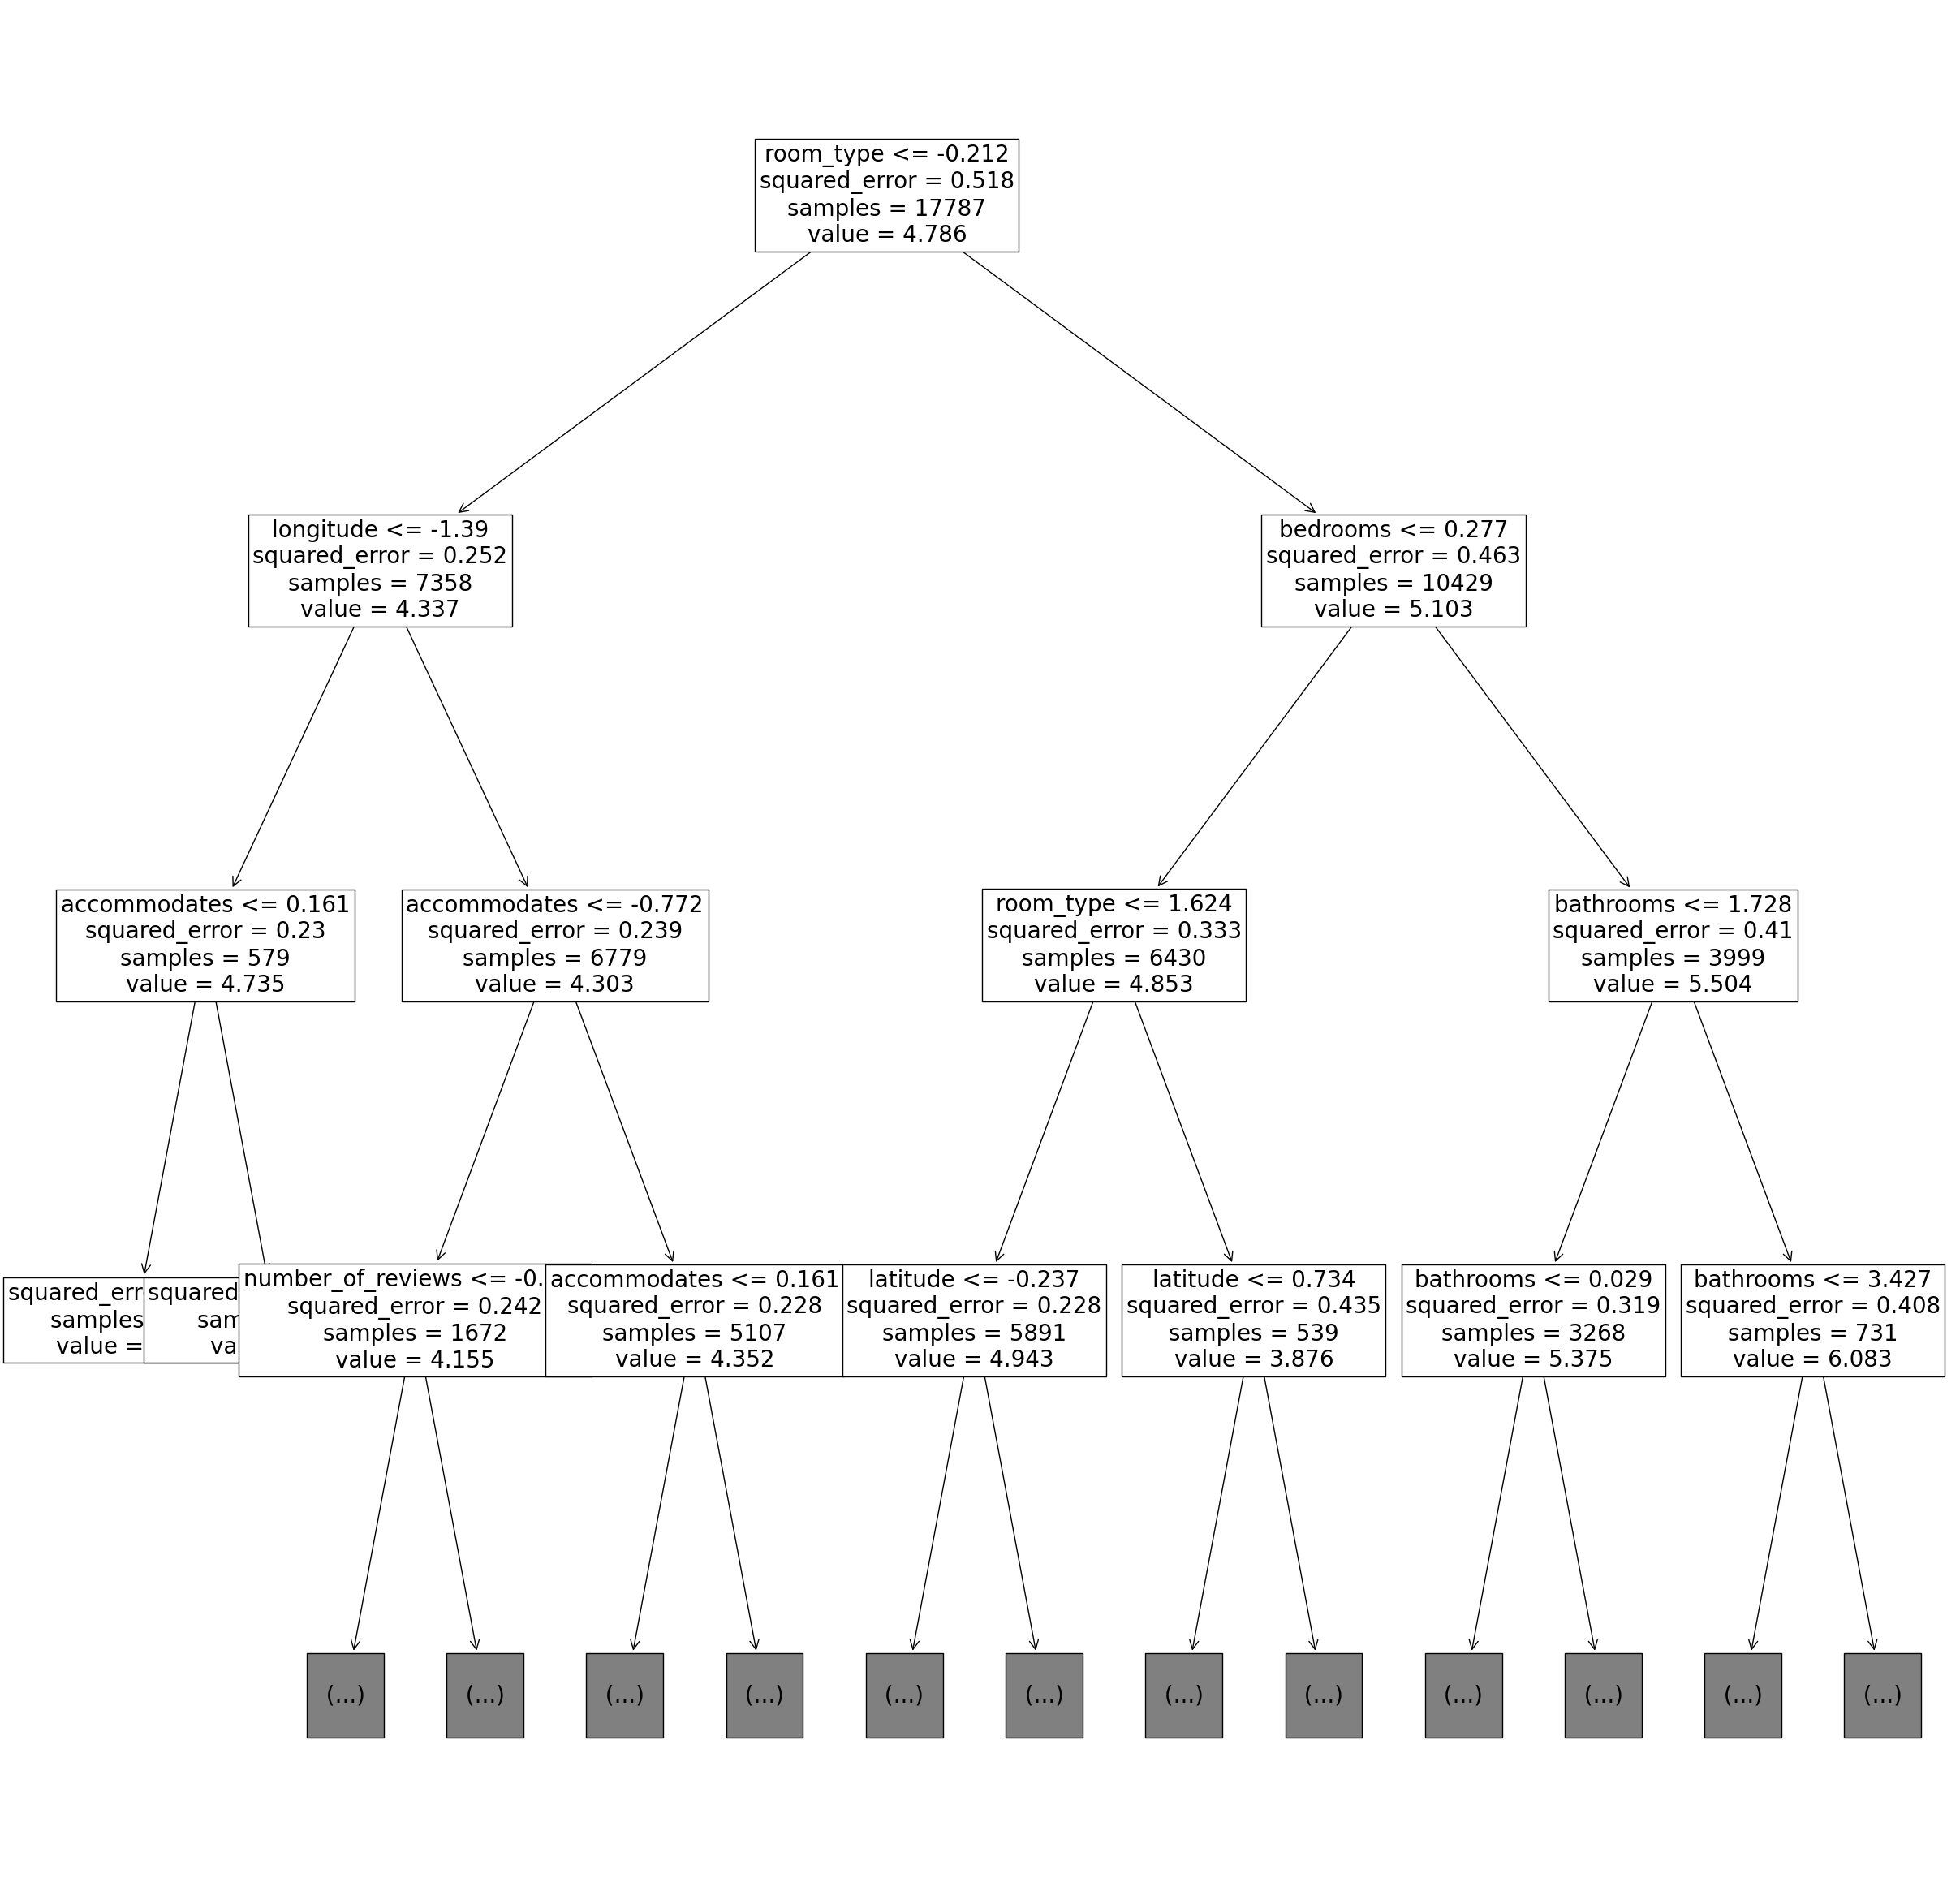

In [18]:
plt.figure(figsize=(30,30))
ax = plot_tree(dtr, feature_names = X_train.columns.tolist(), fontsize=20, max_depth=3)

On applique maintenant notre modèle sur notre jeu de données de test et on détermine la précision des prédictions pour les données d'entraînement et pour celles du test.

In [19]:
model = DTR(ccp_alpha=0.0005)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


print(f"Score en entrainenement : {r2_score(y_true=y_train, y_pred=y_pred_train)}")
print(f"Score en test : {r2_score(y_true=y_test, y_pred=y_pred_test)}")

mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)

print(f"MSE en entraînement : {mse_train}")
print(f"MSE en test : {mse_test}")


Score en entrainenement : 0.617744534817108
Score en test : 0.5931343798268227
MSE en entraînement : 0.19786679515692338
MSE en test : 0.2084348975238032


Nous trouvons un score R² de 59%, ce qui n'est pas satisfaisant et relativement bas. Nous cherchons donc un modèle avec une meilleure précision.

# Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor as RFR

On cherche tout d'abord les paramètres à donner à notre modèle. Nous recherchons maintenant la valeur à donner au paramètre n_estimators. Avec plus que 100 estimateurs, l'apprentissage prend enormenment de temps. pour cela on choisi de le fixer a 100 Dans le contexte de Random forest regression, le paramètre n_estimators spécifie le nombre d'arbres de décision qui seront créés dans l'ensemble de la forêt aléatoire. avec n-estimator fixer a 100, on cherche le meilleur pourcentage de carcateristique (donc le parametre max_features) used at each split.  One of the advantages of Random Forest is that, as we use bootstrapped datasets, we can estimate the error of each row using trees that weren't trained with that row. This is called out-of-bag score (OOB R2) , and we will be using that instead of cross-validation to evaluate the parameters.

100%|██████████| 5/5 [01:17<00:00, 15.55s/it]


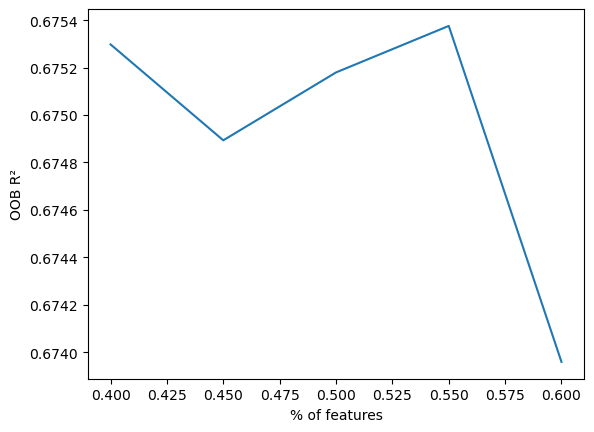

In [21]:
params = []
oob_scores = []
for i in tqdm(range(5)):
    max_ft = 0.4 + i/20
    params.append(max_ft)
    rfr = RFR(oob_score = True, max_features = max_ft)
    rfr.fit(X_train, y_train)
    oob_scores.append(rfr.oob_score_)
    
ax=plt.plot(params, oob_scores)
ax=plt.xlabel("% of features")
ax=plt.ylabel("OOB R²")

Nous observons que le nombre de caractéristiques permettant d'obtenir une précision optimale sur des données non encore vues durant l'apprentissage, (c'est-à-dire sur un nouveau jeu de données) est de 55% .

Ensuite, nous déterminons l'importance des différentes caractéristiques du modèle et affichons les six plus importantes. Dans une forêt aléatoire (RandomForestRegressor), l'importance d'une caractéristique est calculée en observant combien cette caractéristique réduit l'impureté des nœuds dans les arbres de décision de la forêt. Par exemple, si une caractéristique comme "nombre de chambres" réduit significativement l'erreur dans les prédictions de prix de location, alors cette caractéristique aura une grande importance. À l'inverse, une caractéristique qui n'apporte pas beaucoup d'information utile pour la prédiction aura une importance faible ou nulle.

In [22]:
rfr = RFR(n_estimators = 100, max_features = 0.55)
rfr.fit(X_train, y_train)
ft_importance = pd.DataFrame({"feature": X_train.columns.tolist(), "importance": rfr.feature_importances_}).sort_values("importance", ascending=False).query("importance > 0")
print(ft_importance.shape[0])
ft_importance.head(6)

19


,feature,importance
1,room_type,0.229577
17,bedrooms,0.159898
14,longitude,0.124388
13,latitude,0.110986
3,accommodates,0.086531
4,bathrooms,0.061944


On voit donc que le type de chambre, le nombre de lits et la localisation (longitude/latitude) ont le plus d'importance. Ceci est assez logique, car ces trois caractéristiques sont celles qui comptent le plus pour estimer le prix d'un bien immobilier.

Nous appliquons maintenant notre modèle sur notre jeu de données de test et déterminons la précision des prédictions pour les données d'entraînement et celles du test.

In [23]:
model = RFR(n_estimators = 100, max_features = 0.55)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


print(f"Score en entrainenement : {r2_score(y_true=y_train, y_pred=y_pred_train)}")
print(f"Score en test : {r2_score(y_true=y_test, y_pred=y_pred_test)}")

mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)

print(f"MSE en entraînement : {mse_train}")
print(f"MSE en test : {mse_test}")


Score en entrainenement : 0.9549960245834428
Score en test : 0.667289669240685
MSE en entraînement : 0.023295395870231987
MSE en test : 0.17044557283412445


Nous obtenons un score R² de 67 %, ce qui nous semble assez correct. Nous tentons tout de même de trouver un modèle avec une meilleure précision.

# xgboost 
XGBoost est une bibliothèque de machine learning optimisée pour les modèles de gradient boosting, souvent utilisée pour les tâches de classification et de régression en raison de sa performance et de son efficacité. Elle permet de construire des modèles robustes et précis en combinant plusieurs arbres de décision faibles pour améliorer la prédiction.

Pour ce modèle, nous allons suivre le même schéma que précédemment. Nous cherchons à déterminer les paramètres de notre modèle : n_estimators et notre taux d'apprentissage alpha (learning_rate).

In [24]:
import xgboost as xgb

train_scores = []
validation_scores = []
nb_estimators = []
#tqdm: bibliothèque pour afficher une barre de progression pour la boucle, ce qui facilite le suivi de l'avancement.
for n in tqdm([100,200,300,400,500]):
    nb_estimators.append(n)
    XGB= xgb.XGBRegressor(n_estimators=n)
    resultats = cross_validate(XGB, X_train, y_train, cv=5, return_train_score = True)
    train_scores.append(resultats["train_score"].mean())
    validation_scores.append(resultats["test_score"].mean())

100%|██████████| 5/5 [00:15<00:00,  3.17s/it]


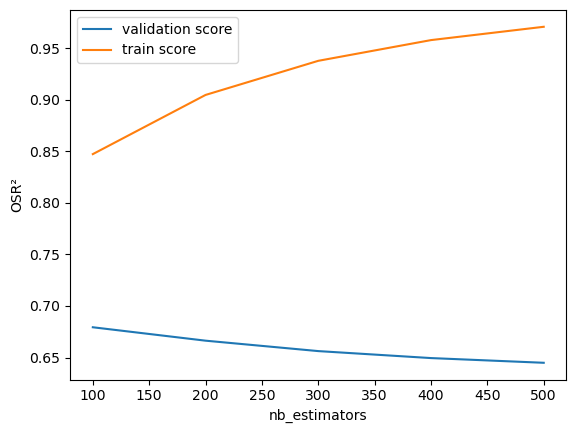

In [25]:
ax=plt.plot(nb_estimators, validation_scores)
ax=plt.plot(nb_estimators, train_scores)
ax=plt.legend(["validation score", "train score"])
ax=plt.xlabel("nb_estimators")
ax=plt.ylabel("OSR²")

On choisit donc n_estimators égal à 100. Cherchons à présent le meilleur pas d'apprentissage.

In [26]:
train_scores = []
validation_scores = []
alphas = []
#tqdm: bibliothèque pour afficher une barre de progression pour la boucle, ce qui facilite le suivi de l'avancement.
for i in range(1, 35, 5):
    alpha=i/100
    alphas.append(alpha)
    XGB= xgb.XGBRegressor(n_estimators=100, learning_rate=alpha)
    resultats = cross_validate(XGB, X_train, y_train, cv=5, return_train_score = True)
    train_scores.append(resultats["train_score"].mean())
    validation_scores.append(resultats["test_score"].mean())

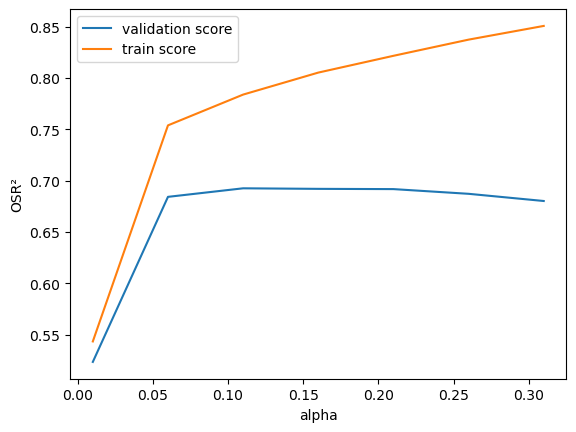

In [27]:
ax=plt.plot(alphas, validation_scores)
ax=plt.plot(alphas, train_scores)
ax=plt.legend(["validation score", "train score"])
ax=plt.xlabel("alpha")
ax=plt.ylabel("OSR²")

On choisit donc alpha=0.06

On applique maintenant notre modèle sur notre jeu de données de test et on détermine la précision des prédictions pour les données d'entraînement et pour celles du test.

In [28]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.06)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


print(f"Score en entrainenement : {r2_score(y_true=y_train, y_pred=y_pred_train)}")
print(f"Score en test : {r2_score(y_true=y_test, y_pred=y_pred_test)}")

mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)

print(f"MSE en entraînement : {mse_train}")
print(f"MSE en test : {mse_test}")


Score en entrainenement : 0.746600373831495
Score en test : 0.6790854494968344
MSE en entraînement : 0.13116718135065805
MSE en test : 0.1644026630206649


# Comparaison des résultats des modèles

- Score avec la régression linéaire : 42%
- Score avec un arbre de décision : 59%
- Score avec la régression de la forêt aléatoire (Random Forest) : 67%
- Score avec Extreme Gradient Boosting (XGBoost) : 68%

On choisit donc le modèle : XGBoost

# Prédiction sur le fichier de test

Comme nous avons déjà nettoyé le fichier, nous nous contentons de charger les données de test et de faire nos prédictions avec le modèle XGBoost. On a donc appliqué le même traitement que pour le fichier entraînement


In [39]:
airbnb_test = pd.read_csv("airbnb_test_cleaned.csv")
airbnb_test

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,1.0,1,9,3,1.0,0,1,1,1,0,1,-1,1,40.696524,-73.991617,2,100.0,1.0,1.0
1,1.0,1,15,7,1.0,0,1,1,1,0,0,100,0,40.766115,-73.989040,6,93.0,3.0,3.0
2,1.0,1,19,5,1.0,0,2,1,1,0,1,100,0,40.808110,-73.943756,10,92.0,1.0,3.0
3,0.0,1,15,4,1.0,0,0,1,3,0,1,-1,1,37.772004,-122.431619,0,-1.0,2.0,2.0
4,1.0,1,12,2,1.0,0,2,1,2,0,1,100,0,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51872,0.0,1,20,4,1.0,0,0,0,0,0,1,-1,1,34.156056,-118.235445,0,-1.0,1.0,1.0
51873,0.0,1,42,4,1.0,0,2,1,1,0,0,100,1,40.765323,-73.961502,22,98.0,2.0,3.0
51874,1.0,1,13,3,1.0,0,1,1,1,0,0,36,1,40.770700,-73.963228,3,73.0,0.0,2.0
51875,0.0,0,15,4,1.0,0,2,1,0,0,1,100,1,34.099417,-118.276401,69,96.0,1.0,2.0


In [42]:
scaler = StandardScaler()

airbnb_test_std = scaler.fit_transform(airbnb_test)
airbnb_test= pd.DataFrame(airbnb_test_std, columns=airbnb_test.columns)
airbnb_test

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,-0.179752,0.708006,-1.237526,-0.071817,-0.396779,-0.155256,0.057665,0.604245,-0.208619,-0.074717,0.700666,-1.648423,0.596609,0.732175,0.849941,-0.498646,0.679900,-0.310435,-0.563785
1,-0.179752,0.708006,-0.371830,1.781974,-0.396779,-0.155256,0.057665,0.604245,-0.208619,-0.074717,-1.427214,0.672409,-1.676139,0.754742,0.850059,-0.393663,0.506549,2.035613,1.030082
2,-0.179752,0.708006,0.205300,0.855078,-0.396779,-0.155256,1.384844,0.604245,-0.208619,-0.074717,0.700666,0.672409,-1.676139,0.768360,0.852144,-0.288680,0.481785,-0.310435,1.030082
3,-0.560116,0.708006,-0.371830,0.391631,-0.396779,-0.155256,-1.269515,0.604245,1.261931,-0.074717,0.700666,-1.648423,0.596609,-0.216184,-1.380244,-0.551138,-1.821307,0.862589,0.233149
4,-0.179752,0.708006,-0.804678,-0.535265,-0.396779,-0.155256,1.384844,0.604245,0.526656,-0.074717,0.700666,0.672409,-1.676139,0.157911,0.709842,-0.446155,-0.805966,-1.483460,-0.563785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51872,-0.560116,0.708006,0.349583,0.391631,-0.396779,-0.155256,-1.269515,-1.654957,-0.943893,-0.074717,0.700666,-1.648423,0.596609,-1.388759,-1.187051,-0.551138,-1.821307,-0.310435,-0.563785
51873,-0.560116,0.708006,3.523802,0.391631,-0.396779,-0.155256,1.384844,0.604245,-0.208619,-0.074717,-1.427214,0.672409,0.596609,0.754485,0.851327,0.026271,0.630371,0.862589,1.030082
51874,-0.179752,0.708006,-0.660396,-0.071817,-0.396779,-0.155256,0.057665,0.604245,-0.208619,-0.074717,-1.427214,-0.798217,0.596609,0.756228,0.851248,-0.472400,0.011261,-1.483460,0.233149
51875,-0.560116,-1.135554,-0.371830,0.391631,-0.396779,-0.155256,1.384844,0.604245,-0.943893,-0.074717,0.700666,0.672409,0.596609,-1.407126,-1.188937,1.259825,0.580843,-0.310435,0.233149


In [43]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.06)
model.fit(X_train, y_train)

y_final_prediction = model.predict(airbnb_test)
print(y_final_prediction)

[4.722266  5.1572475 4.770747  ... 4.673511  4.068243  5.679094 ]


## Sauvegarde dans le fichier de prédiction

In [44]:
prediction_example = pd.read_csv("prediction_example.csv")
prediction_example["logpred"] = y_final_prediction

prediction_example.to_csv("MaPredictionFinale.csv", index=False) # index=False pour éviter d’ajouter l’index interne à pandas


## Test du  fichier

In [45]:
def estConforme(monFichier_csv):
    votre_prediction = pd.read_csv(monFichier_csv)

    fichier_exemple = pd.read_csv("prediction_example.csv")

    assert votre_prediction.columns[1] == fichier_exemple.columns[1], f"Attention, votre colonne de prédiction doit s'appeler {fichier_exemple.columns[1]}, elle s'appelle '{votre_prediction.columns[1]}'"
    assert len(votre_prediction) == len(fichier_exemple), f"Attention, vous devriez avoir {len(fichier_exemple)} prédiction dans votre fichier, il en contient '{len(votre_prediction)}'"

    assert np.all(votre_prediction.iloc[:,0] == fichier_exemple.iloc[:, 0])

    print("Fichier conforme!")

estConforme("MaPredictionFinale.csv")

Fichier conforme!
